In [1]:
# iterate over every data object in the data/training/synthetic/raw folder
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

data_dir = Path("../data/training/synthetic/raw")
data_files = os.listdir(data_dir)
data_files = glob.glob(f"{data_dir}/*.pt")

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    data = torch.load(data_file)
    metrics.append(data.metrics)
    settings.append(data.settings)
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

100%|██████████| 1000/1000 [00:07<00:00, 138.72it/s]


In [2]:
df_metrics.columns

Index(['diameter', 'average_shortest_path_length',
       'average_clustering_coefficient', 'average_degree', 'n_nodes',
       'n_edges', 'avg_degree_centrality'],
      dtype='object')

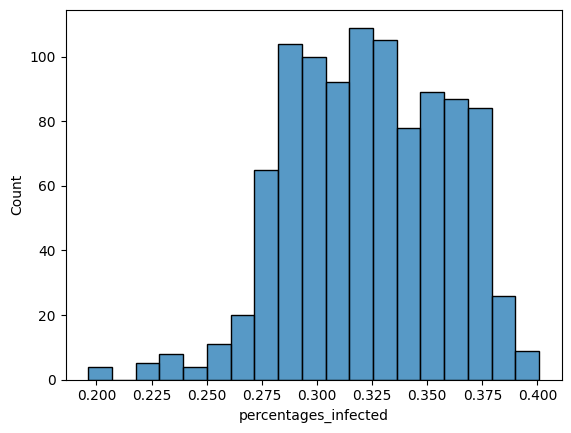

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
# join the two dataframes on the index
# remove column "Unnamed: 0" from df_metrics
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
df_metrics = df_metrics.join(df_settings)
df_metrics["percentages_infected"] = df_metrics["currently_infected"] / df_metrics["n_nodes"]

sns.histplot(data=df_metrics, x="percentages_infected")
plt.show()

<Axes: xlabel='avg_degree_centrality', ylabel='percentages_infected'>

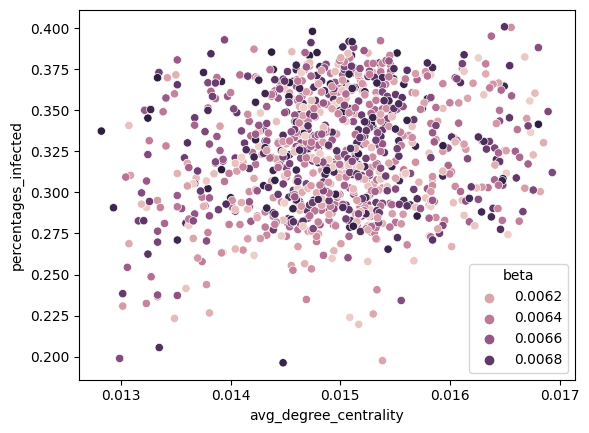

In [4]:
# plot the relationship between iterations and percentage infected
# set x-axis range to 0-10

sns.scatterplot(data=df_metrics, x="avg_degree_centrality", y="percentages_infected", hue="beta")

/tmp/ipykernel_3407919/1911407649.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


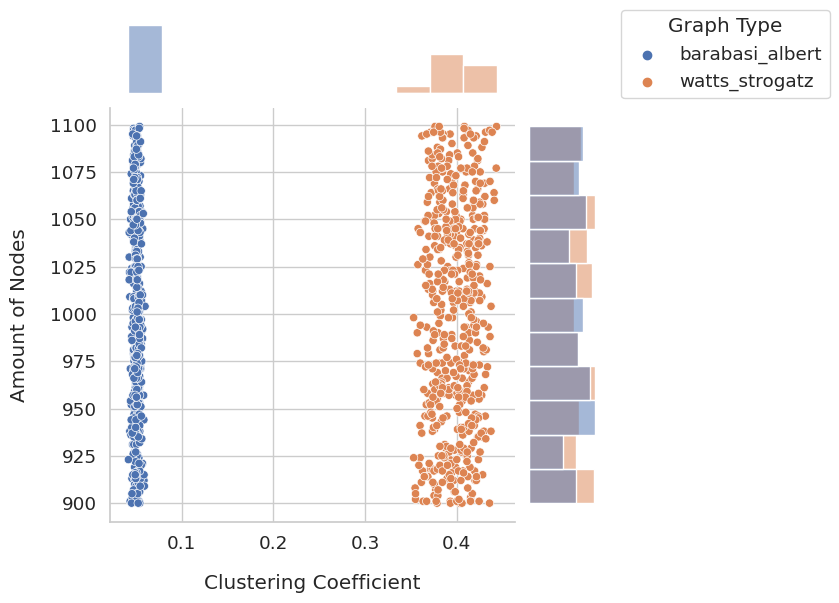

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=df_metrics, 
    # y="avg_degree_centrality", 
    # y="diameter", 
    x="average_clustering_coefficient", 
    y="n_nodes", 
    # y="n_edges", 
    hue="graph_type",
)
g1.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3407919/981632838.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


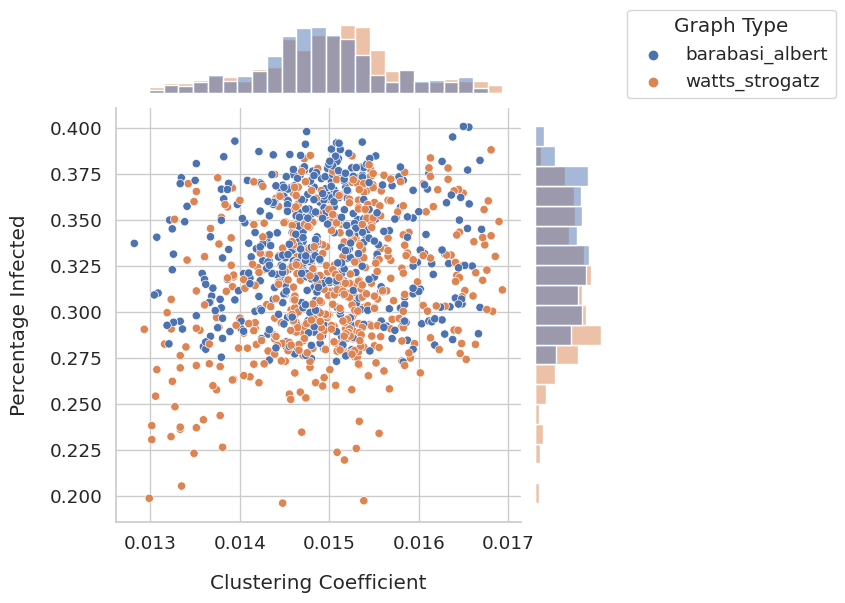

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=df_metrics, 
    x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    y="percentages_infected", 
    hue="graph_type",
)
g.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
# show the the top 10 highest percentage infected examples
df_metrics[df_metrics["percentages_infected"] == 1].sort_values(by="avg_degree_centrality", ascending=True).head(20)

,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected


Index(['Unnamed: 0', 'diameter', 'average_shortest_path_length',
       'average_clustering_coefficient', 'average_degree', 'n_nodes',
       'n_edges', 'avg_degree_centrality'],
      dtype='object')
[0, 0]
[0, 1]
(4.0, 5.0)
[1, 0]
(2.6601423775723543, 3.455593008539005)
[1, 1]
[2, 0]
[2, 1]
[3, 0]
[3, 1]


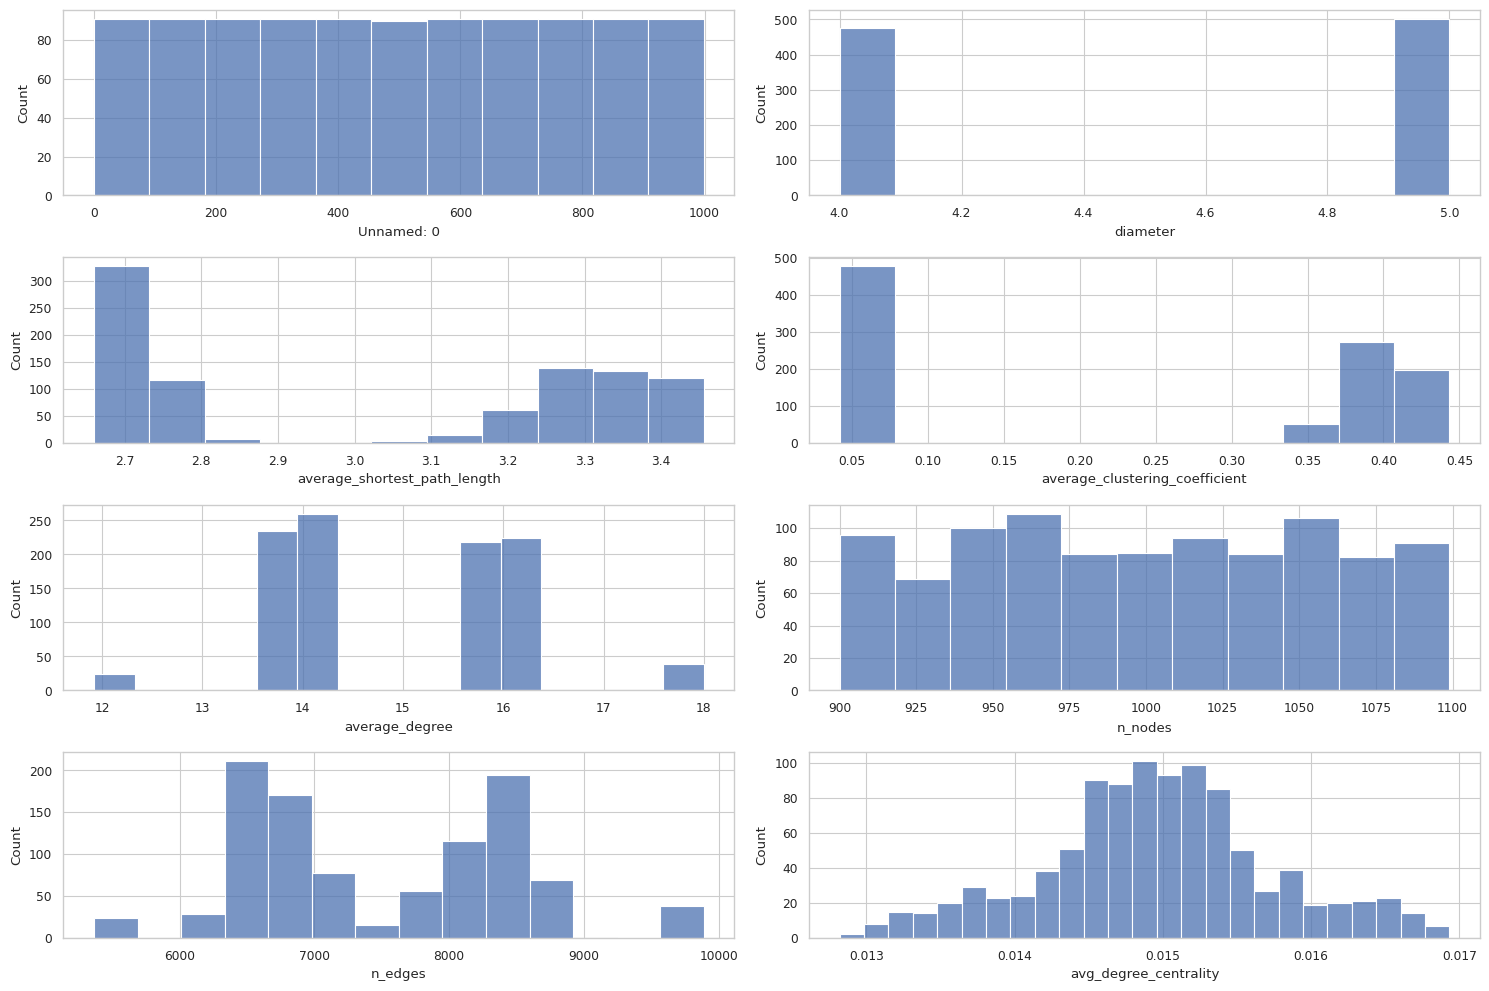

In [8]:
# plot a histogram for each metric
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_metrics = pd.read_csv("metrics.csv")

sns.set_style("whitegrid")
sns.set_context("paper")

fig, ax = plt.subplots(4, 2, figsize=(15, 10))
print(df_metrics.columns)
for i, metric in enumerate(df_metrics.columns):
    print([i//2, i%2])
    if metric == "diameter" or metric == "average_shortest_path_length":
    # calculate the interval that contains 95% of the data
        interval = (df_metrics[metric].quantile(0.025), df_metrics[metric].quantile(0.95))
        print(interval)
        filtered_df = df_metrics[df_metrics[metric].between(*interval)]
        sns.histplot(data=filtered_df, x=metric, ax=ax[i//2, i%2])
    else:
        sns.histplot(data=df_metrics, x=metric, ax=ax[i//2, i%2])

plt.tight_layout()
plt.show()

In [9]:
data_files = [Path("../data/validation/airports/raw/0.pt"),
             Path("../data/validation/facebook/raw/0.pt"), 
             Path("../data/validation/karate/raw/0.pt"),
             Path("../data/validation/actor/raw/0.pt"),
             Path("../data/validation/github/raw/0.pt"),
             Path("../data/validation/wiki/raw/0.pt"),
             Path("../data/validation/synthetic/raw/0.pt")
            ]


name = ["airports", "facebook", "karate", "actor", "github", "wiki", "synthetic"]

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    
    try:
        data = torch.load(data_file)
        metrics.append(data.metrics)
        settings.append(data.settings)
        metrics[-1]["name"] = name[data_files.index(data_file)]
    except:
        print(f"missing data file: {data_file}")
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics_validation.csv")
df_settings.to_csv("settings_validation.csv")

df_metrics

100%|██████████| 7/7 [00:00<00:00, 337.92it/s]

missing data file: ../data/validation/github/raw/0.pt
missing data file: ../data/validation/wiki/raw/0.pt


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,name
0,5,2.323611,0.539272,30.040100,399,5993,0.075478,airports
1,8,3.692507,0.605547,43.691013,4039,88234,0.010820,facebook
2,5,2.408200,0.570638,4.588235,34,78,0.139037,karate
3,12,4.110280,0.080193,7.015526,7600,26659,0.000923,actor
4,5,3.449909,0.396199,14.000000,1046,7322,0.013397,synthetic


Index(['Unnamed: 0', 'diameter', 'average_shortest_path_length',
       'average_clustering_coefficient', 'average_degree', 'n_nodes',
       'n_edges', 'avg_degree_centrality', 'name'],
      dtype='object')


IndexError: index 4 is out of bounds for axis 0 with size 4

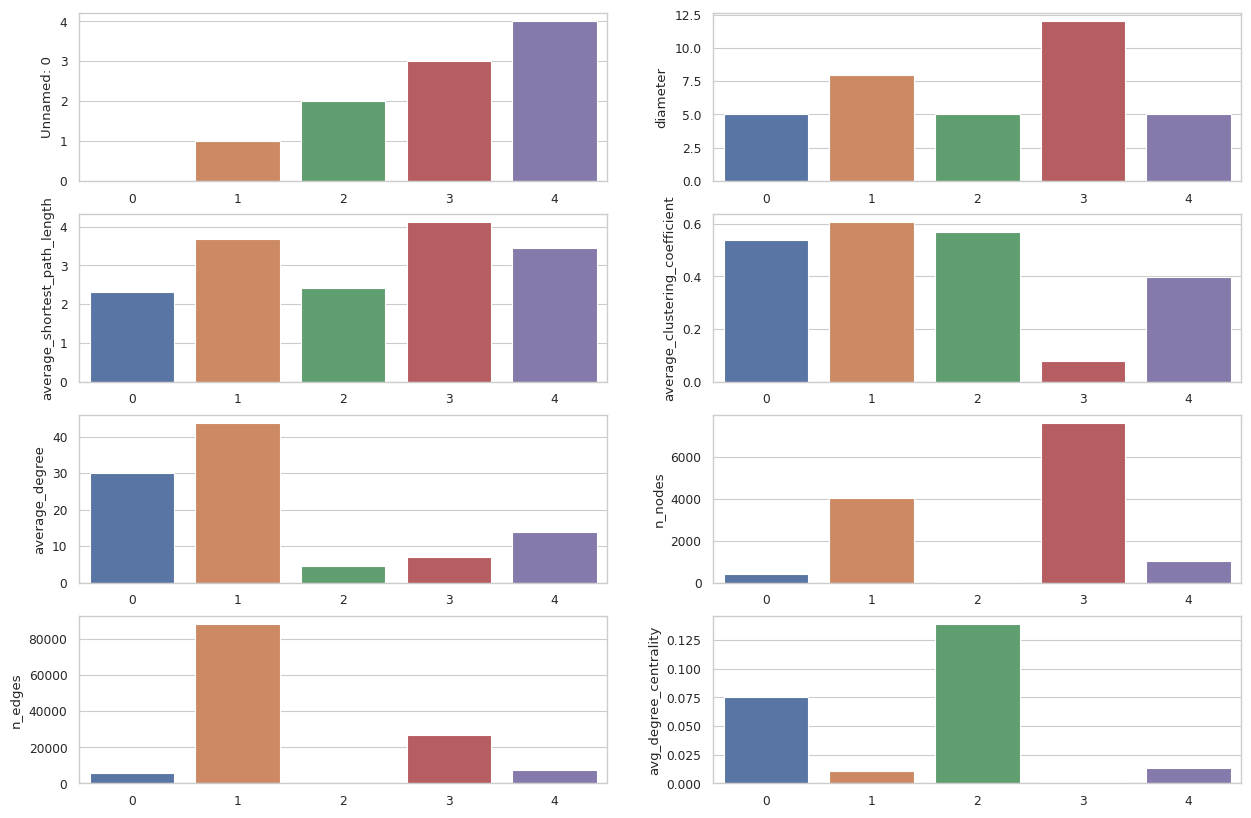

In [10]:
# plot a histogram for each metric
import matplotlib.pyplot as plt
import seaborn as sns

df_metrics = pd.read_csv("metrics_validation.csv")

sns.set_style("whitegrid")
sns.set_context("paper")

fig, ax = plt.subplots(4, 2, figsize=(15, 10))
print(df_metrics.columns)
for i, metric in enumerate(df_metrics.columns):
    # distplay the metric using a bar plot
    sns.barplot(y=df_metrics[metric], x=df_metrics.index, ax=ax[i//2, i%2])

plt.tight_layout()
plt.show()